## Умова лабораторної роботи

### Моделі

Алгоритм роздiлу сумiшi expectation-maximization (EM), GaussianMixture та BayesianGaussianMixture модулю `sklearn.mixture`

### Початкові дані

(а)
```python
sklearn.datasets.make_moons
```
(б)
``` python
import numpy as np
np.random.seed(0)
n_points_per_cluster = 10000
C1 = [-6, -2] + 0.7 * np.random.randn(n_points_per_cluster, 2)
C2 = [-2, 2] + 0.3 * np.random.randn(n_points_per_cluster, 2)
C3 = [1, -2] + 0.2 * np.random.randn(n_points_per_cluster, 2)
C4 = [4, -4] + 0.1 * np.random.randn(n_points_per_cluster, 2)
C5 = [5, 0] + 1.4 * np.random.randn(n_points_per_cluster, 2)
C6 = [5, 6] + 2.0 * np.random.randn(n_points_per_cluster, 2)
X = np.vstack((C1, C2, C3, C4, C5, C6))
```

### Завдання

1. Представити початковi данi графiчно.
2. Побудувати модель кластеризацiї згiдно з варiантом.
3. Виконати кластеризацiю даних на основi моделi.
4. Представити розбиття на кластери графiчно, наприклад, рiзними кольорами.
5. Розрахувати час кластеризацiї. Оцiнити швидкодiю методу на надвеликих наборах даних (наприклад, при збiльшеннi кiлькостi точок даних до ста тисяч i бiльше).
6. Побудувати кiлька альтернативних моделей:
    * задати рiзнi значення кiлькостi кластерiв, в алгоритмах де кiлькiсть кластерiв - параметр.
7. Для кожної альтернативної моделi розрахувати метрики якостi кластеризацiї, що реалiзованi в модулi `sklearn.metrics` (тiльки метрики згiдно з варiантом):
    * Homogeneity.
    * Completeness.
    * V-measure.
8. Виконати аналiз результатiв кластеризацiї одним з неформальних методiв (тiльки методом згiдно з варiантом):
    * чи є розбиття стабiльним на пiдвибiрках даних,
9. Вищенаведенi пункти виконати для заданих двох наборiв даних рiзної форми.
10. Зробити висновки про якiсть роботи моделей на дослiджених даних та про швидкодiю методу.
11. Оцiнити результати кластеризацiї на основi метрик якостi та на основi неформальних методiв. У кожному варiантi задано два набори даних. Спробувати пiдiбрати найкращу модель кластеризацiї для кожного набору даних.


## Метрики якості

$Y_{true}$ - істинні мітки.</br>
$Y_{pred}$ - спрогнозовані мітки.</br>
**Ентропія** - $H(A,S)=-\sum p_i\ln p_i,\ p_i=\dfrac{k_i}{|A|}$.</br>
**Homogeneity (однорідність)** - $h=1-\dfrac{H(Y_{true}|Y_{pred})}{H(Y_{true})}$.</br>
**Completeness (повнота)** - $h(a, b) == c(b, a)$.</br>
**V-measure** - $v=\dfrac{(1+\beta) \cdot h\cdot c}{\beta\cdot  h + c}$

##  Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_moons
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.model_selection import train_test_split

import time

## Moons

### EDA

Інформація про [дані](https://scikit-learn.org/dev/modules/generated/sklearn.datasets.make_moons.html).

In [2]:
X1, y1 = make_moons()

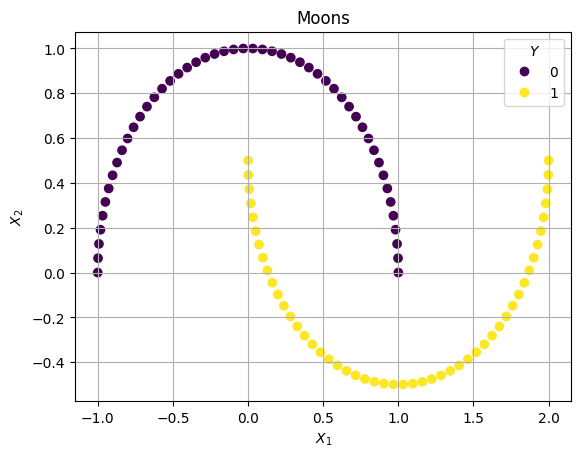

In [3]:
scatter = plt.scatter(X1[:,0], X1[:,1], c=y1, cmap='viridis')
plt.title("Moons")
plt.legend(*scatter.legend_elements(), title="$Y$")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.grid(True)

### Split

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1,
    y1,
    test_size=0.4,
    random_state=42
)

### Train & Evaluation

c:\Users\Asus\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Asus\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


GaussianMixture(n_components=2)
Homogeneity: 0.7614
Completeness: 0.7614
V-measure: 0.7614
time: 0.0151s

BayesianGaussianMixture(n_components=2)
Homogeneity: 0.6216
Completeness: 0.6205
V-measure: 0.6211
time: 0.2226s



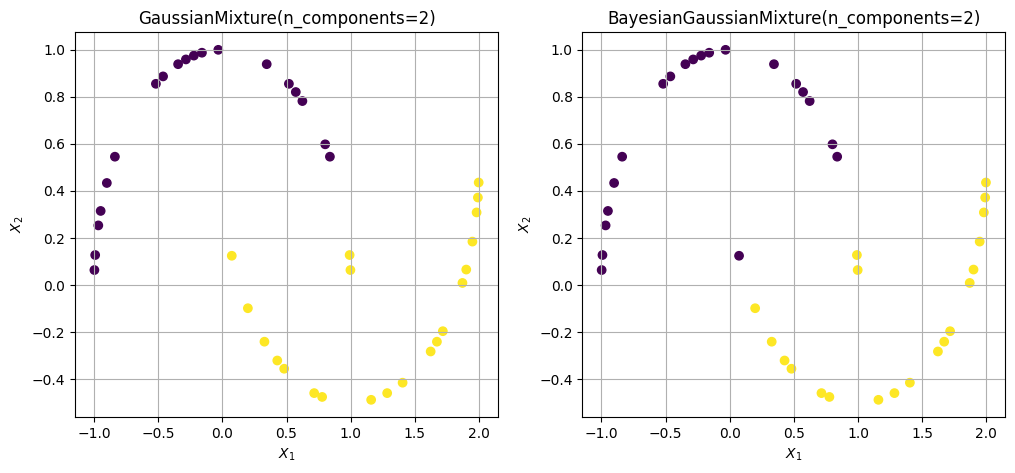

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i,model in enumerate([
    GaussianMixture(n_components=2), 
    BayesianGaussianMixture(n_components=2)
]):
    
    start = time.time()
    model.fit(X1_train)
    end = time.time()

    y_test_pred = model.predict(X1_test)

    h, c, v = homogeneity_completeness_v_measure(y1_test, y_test_pred)
    print(model)
    print(f"Homogeneity: {h:.4f}")
    print(f"Completeness: {c:.4f}")
    print(f"V-measure: {v:.4f}")
    print(f"time: {end - start:.4f}s")
    print()

    axes[i].scatter(X1_test[:, 0], X1_test[:, 1], c=y_test_pred, cmap='viridis')
    axes[i].set_title(model)
    axes[i].set_xlabel("$X_1$")
    axes[i].set_ylabel("$X_2$")
    axes[i].grid(True)

## Clusters

###  EDA

In [27]:
np.random.seed(0)
n_points_per_cluster = 10000
C1 = [-6, -2] + 0.7 * np.random.randn(n_points_per_cluster, 2)
C2 = [-2, 2] + 0.3 * np.random.randn(n_points_per_cluster, 2)
C3 = [1, -2] + 0.2 * np.random.randn(n_points_per_cluster, 2)
C4 = [4, -4] + 0.1 * np.random.randn(n_points_per_cluster, 2)
C5 = [5, 0] + 1.4 * np.random.randn(n_points_per_cluster, 2)
C6 = [5, 6] + 2.0 * np.random.randn(n_points_per_cluster, 2)

X2 = np.vstack((C1, C2, C3, C4, C5, C6))
y2 = np.hstack([[i for j in range(n_points_per_cluster)] for i in range(6)])

In [28]:
print(f"X2 shape: {X2.shape}")
print(f"y2 shape: {y2.shape}")

X2 shape: (60000, 2)
y2 shape: (60000,)


### Split Data

In [30]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2,
    y2,
    test_size=0.1,
    random_state=42
)

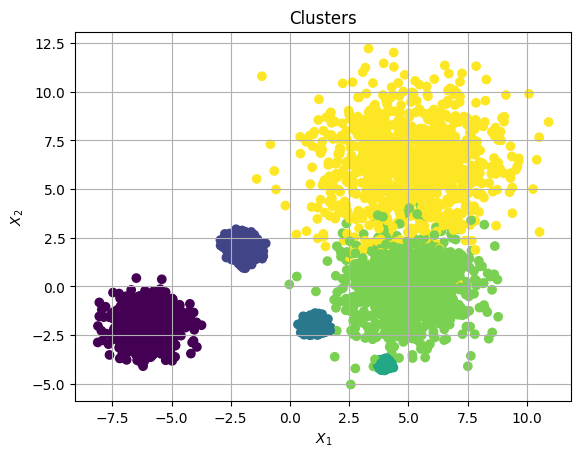

In [31]:
plt.scatter(X2_test[:, 0],X2_test[:, 1],c=y2_test,cmap='viridis')
plt.title("Clusters")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.grid(True)

### Train & Evaluation

GaussianMixture(n_components=6)
Homogeneity: 0.9720
Completeness: 0.9721
V-measure: 0.9721
time: 0.7272s

BayesianGaussianMixture(n_components=6)
Homogeneity: 0.9705
Completeness: 0.9706
V-measure: 0.9706
time: 3.1095s



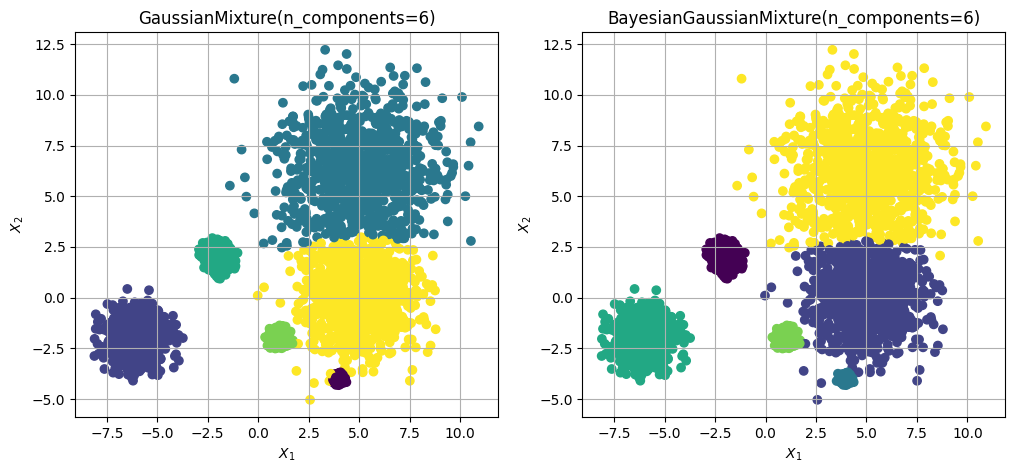

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i,model in enumerate([
    GaussianMixture(n_components=6), 
    BayesianGaussianMixture(n_components=6)
]):
    
    start = time.time()
    model.fit(X2_train)
    end = time.time()

    y_test_pred = model.predict(X2_test)

    h, c, v = homogeneity_completeness_v_measure(y2_test, y_test_pred)
    print(model)
    print(f"Homogeneity: {h:.4f}")
    print(f"Completeness: {c:.4f}")
    print(f"V-measure: {v:.4f}")
    print(f"time: {end - start:.4f}s")
    print()

    axes[i].scatter(X2_test[:, 0], X2_test[:, 1], c=y_test_pred, cmap='viridis')
    axes[i].set_title(model)
    axes[i].set_xlabel("$X_1$")
    axes[i].set_ylabel("$X_2$")
    axes[i].grid(True)

## Висновки

Обидві моделі (`GaussianMixture` та `BayesianGaussianMixture`) не справилися з кластеризацією даних з набору `make_moons`, проте з більш простим набором даних але за розмірами більше за перший набір, досить добре справилися, про що кажуть метрики якості оцінки моделей. Головний недолік моделей - швидкість навчання, на яку напряму впливає розмір навчальної вибірки.